<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_414_machined_surfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

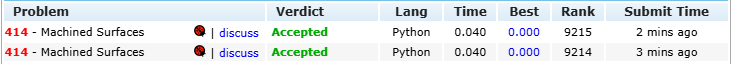

**@PDF: [UVA 414 - Machined Surfaces](https://onlinejudge.org/external/4/414.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 414 Machined Surfaces

An imaging device furnishes digital images of two machined surfaces that eventually will be assembled in contact with each other. The roughness of this final contact is to be estimated.

A digital image is composed of the two characters, 'X' and ' ' (space). There are always 25 columns to an image, but the number of rows, N, is variable. Column one (1) will always have an 'X' in it and will be part of the left surface. The left surface can extend to the right from column one (1) as contiguous 'X's.

Similarly, column 25 will always have an 'X' in it and will be part of the right surface. The right surface can extend to the left from column 25 as contiguous 'X's.
```
Digital-Image View of Surfaces
Left                          Right
XXXX                          XXXXX-
XXX                           XXXXXXX
XXXXX                         XXXX
XX                            XXXXXX
XXX                           XXXX
1                             N
XXXXXX
↑                             ↑
1                             25
```

In each row of the image, there can be zero or more space characters separating the left surface from the right surface. There will never be more than a single blank region in any row.

For each image given, you are to determine the total "void" that will exist after the left surface has been brought into contact with the right surface. The "void" is the total count of the spaces that remains between the left and right surfaces after theyhave been brought into contact.

The two surfaces are brought into contact by displacing them strictly horizontally towards each other until a rightmost 'X' of the left surface of some row is immediately to the left of the leftmost 'X' of the right surface of that row. There is no rotation or twisting of these two surfaces as they are brought into contact; they remain rigid, and only move horizontally.

Note: The original image may show the two surfaces already in contact, in which case no displacement enters into the contact roughness estimation.

## Input

The input consists of a series of digital images. Each image data set has the following format:

First line:
A single unsigned integer, N, with value greater than zero (0) and less than 13. The first digit of N will be the first character on a line.

Next N lines:
Each line has exactly 25 characters; one or more 'X's, then zero or more spaces, then one or more 'X's.

The end of data is signaled by a null data set having a zero on the first line of an image data set and no further data.

## Output

For each image you receive as a data set, you are to reply with the total void (count of spaces remaining after the surfaces are brought into contact). Use the default output for a single integer on a line.

Note: In the example input file below, the spaces have been replaced with the character 'B' for ease of reading. The actual input file will use the ASCII-space character, not 'B'.

## Sample Input

4\
XXXXBBBBBBBBBBBBBBBBXXXXX\
XXXBBBBBBBBBBBBBBBXXXXXXX\
XXXXXBBBBBBBBBBBBBBBBXXXX\
XXBBBBBBBBBBBBBBBBBXXXXXX\
2\
XXXXXXXXXXXXXXXXXXXXXXXXX\
XXXXXXXXXXXXXXXXXXXXXXXXX\
1\
XXXXXXXXXBBBBBBBBBBBBBBXX\
0


## Sample Output

4\
0\
0

In [ ]:
# Define a constant, possibly representing the standard or maximum width of a line.
LINE_LEN = 25

# Start an infinite loop to process multiple test cases or blocks of input.
# The loop will terminate based on specific input conditions (n=0) or end-of-file.
while True:
  try:
    # Read the number of lines (n) for the current block/test case.
    n_str = input() # Read as string first
    # Handle potential empty input line causing ValueError if directly converting
    if not n_str:
        break # Exit if we encounter an unexpected empty line where n was expected
    n = int(n_str)

    # Termination condition: If the number of lines read is 0, stop processing.
    if n == 0:
      break

    # Initialize a list to store the calculated "relevant length" for each line that contains spaces.
    surface_lengths = []
    # Initialize the maximum relevant length found so far within this block to 0.
    max_relevant_len = 0

    # Process each of the 'n' lines in the current block.
    for i in range(n):
      # Read the next line of input.
      line = str(input())
      # Remove leading and trailing whitespace, which might affect space finding.
      line = line.strip()

      # Find the index of the *first* occurrence of a space (' ').
      # Returns -1 if no space is found.
      first_space_index = line.find(' ')

      # Check if the line contains any spaces.
      if first_space_index == -1:
        # Case 1: Line has NO spaces.
        # The problem logic seems to imply that such lines might potentially set
        # the overall maximum relevant length for the block to LINE_LEN,
        # but they don't contribute a specific length value to the 'surface_lengths' list.
        # We update max_relevant_len only if LINE_LEN is greater than the current max.
        # This specific handling depends heavily on the exact problem definition.
        if LINE_LEN > max_relevant_len:
             max_relevant_len = LINE_LEN
        # We don't calculate or store a 'current_len' for this line in the list.

      else:
        # Case 2: Line HAS at least one space.
        # Find the index of the *last* occurrence of a space (' ').
        last_space_index = line.rfind(' ')

        # Calculate the 'relevant length' for this line based on the positions
        # of the first and last spaces and the constant LINE_LEN.
        # The formula's meaning is problem-specific. It might relate to the number
        # of non-space characters, or the "empty space" based on LINE_LEN.
        # Example: line = "X   X", LINE_LEN = 25
        # first_space_index = 1, last_space_index = 4 (assuming strip didn't remove internal spaces)
        # current_len = 1 + 25 - 4 - 1 = 21
        current_len = first_space_index + LINE_LEN - last_space_index - 1

        # Update the overall maximum relevant length if the current line's length is greater.
        if current_len > max_relevant_len:
          max_relevant_len = current_len

        # Add the calculated relevant length for *this specific line* to our list.
        surface_lengths.append(current_len)

    # After processing all 'n' lines for the block:
    # Calculate the final result for this block.
    # 'map(lambda x: max_relevant_len - x, surface_lengths)' creates an iterator
    # where each element is the difference between the block's overall 'max_relevant_len'
    # and the 'current_len' (x) stored for each line *that had spaces*.
    # 'sum(...)' adds up all these differences.
    # This calculation might represent something like the total "indentation" needed
    # or the total "wasted space" relative to the line that determined the max length.
    result = sum(map(lambda x: max_relevant_len - x, surface_lengths))

    # Print the final calculated result for the current block.
    print(result)

  # Handle the End-Of-File error, which occurs if the input stream ends
  # unexpectedly (e.g., end of input file in competitive programming).
  # This provides a graceful way to exit the loop when there's no more input.
  except EOFError:
    break
  # Handle potential errors if input cannot be converted to int where expected
  except ValueError:
    # If input() for 'n' returns something that's not a valid integer
    print("Invalid input for number of lines, stopping.")
    break